<a href="https://colab.research.google.com/github/dhanushnayak/Forecast_using_scalecast/blob/main/ScaleCast_forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

!pip install scalecast --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 873.7/873.7 kB 13.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.2/216.2 kB 22.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 66.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.6/98.6 MB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 68.5 MB/s eta 0:00:00
  Created wheel for scalecast: filename=SCALECAST-0.18.5-py3-none-any.whl size=111271 sha256=abf3b5c7cf8ba0753225ac8946181303887ea2038b55b511c3803ea98e384af5
  Stored in directory: /root/.cache/pip/wheels/30/32/ba/76f7451f377557131b3736c35cd6ab417576434d865d548f24
  Created wheel for eli5: filename=eli5-0.13.0-py2.py3-none-any.whl size=1

In [73]:
import pandas as pd
import numpy as np
import seaborn as sns
from scalecast.Forecaster import Forecaster
#del forc

<Axes: xlabel='Month'>

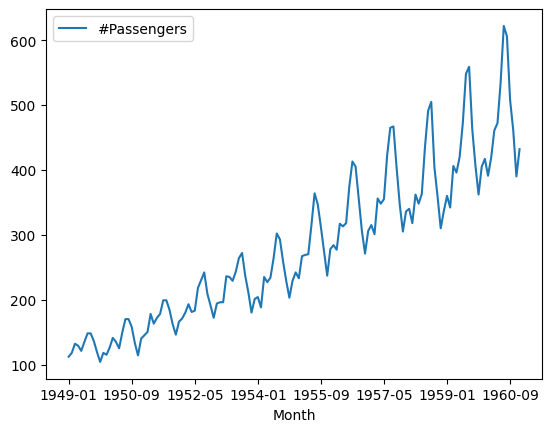

In [74]:
data = pd.read_csv('/content/AirPassengers.csv',index_col='Month')
data.plot()

In [75]:
forc =  Forecaster(
    y=data['#Passengers'],
    current_dates=data.index
)

In [76]:
forc

Forecaster(
    DateStartActuals=1949-01-01T00:00:00.000000000
    DateEndActuals=1960-12-01T00:00:00.000000000
    Freq=MS
    N_actuals=144
    ForecastLength=0
    Xvars=[]
    TestLength=0
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=None
    CurrentEstimator=mlr
    GridsFile=Grids
)

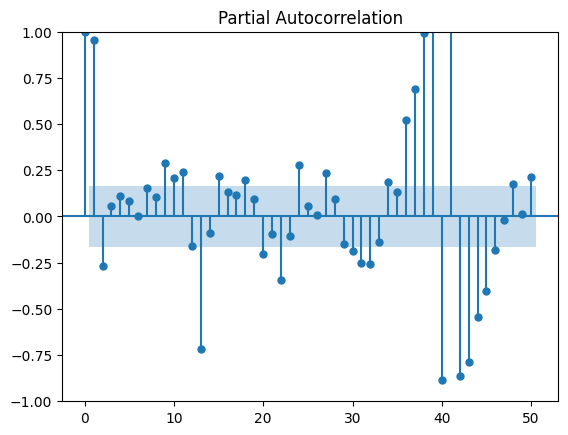

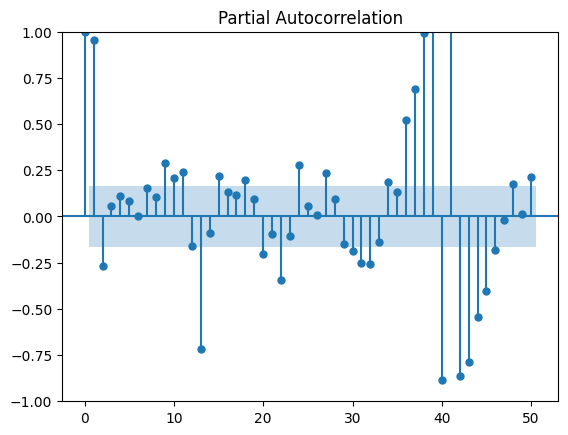

In [77]:
forc.plot_pacf(lags=50)


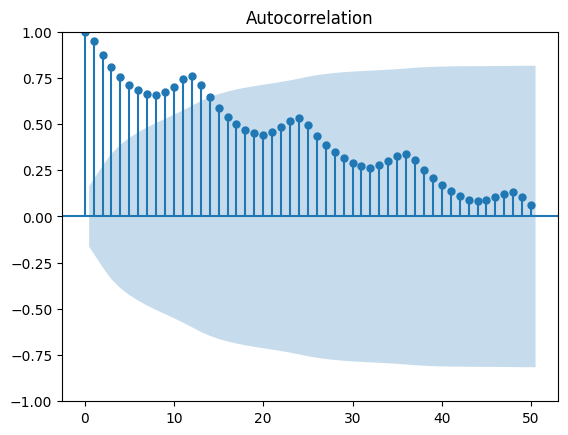

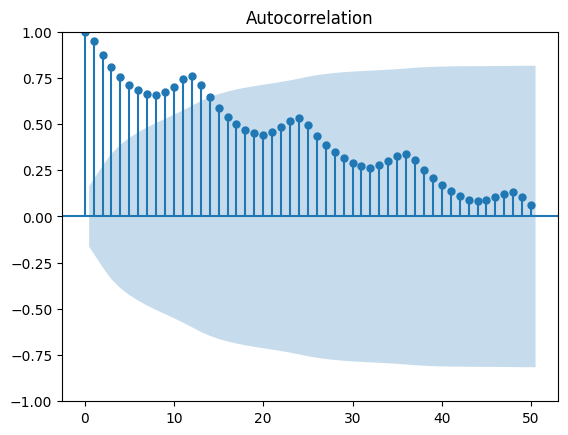

In [78]:
forc.plot_acf(lags=50)

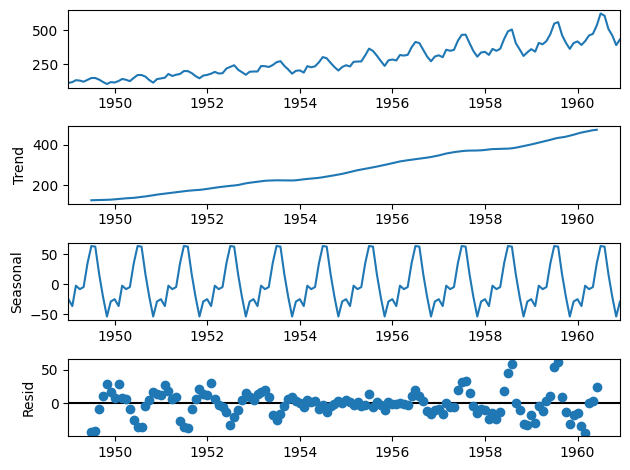

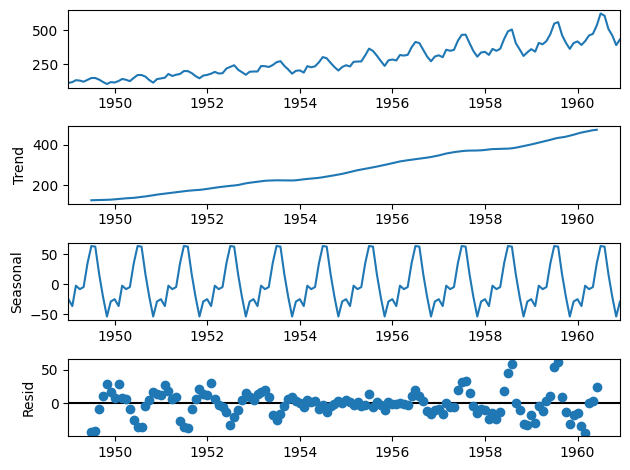

In [79]:
forc.seasonal_decompose().plot()


In [80]:
stat, pval, _, _, _, _ = forc.adf_test(full_res=True)
pval

0.991880243437641

In [81]:
forc.set_test_length(12) 
forc.generate_future_dates(12)
forc.set_estimator('lstm')

5/5 [==============================] - 0s 2ms/step


<Axes: xlabel='Date', ylabel='Values'>

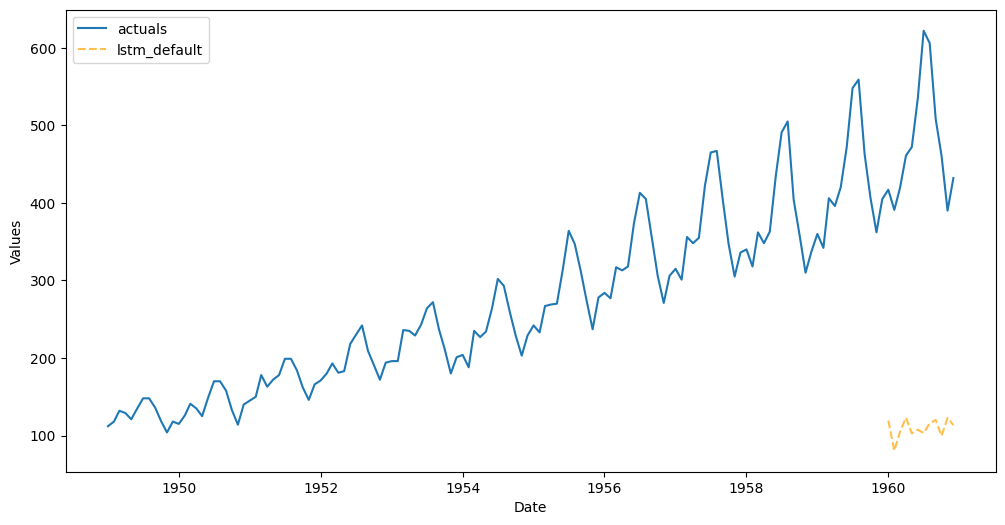

In [82]:
import warnings
warnings.filterwarnings("ignore")
forc.manual_forecast(call_me='lstm_default')
forc.plot_test_set(ci=True)

3/3 [==============================] - 0s 6ms/step


<Axes: xlabel='Date', ylabel='Values'>

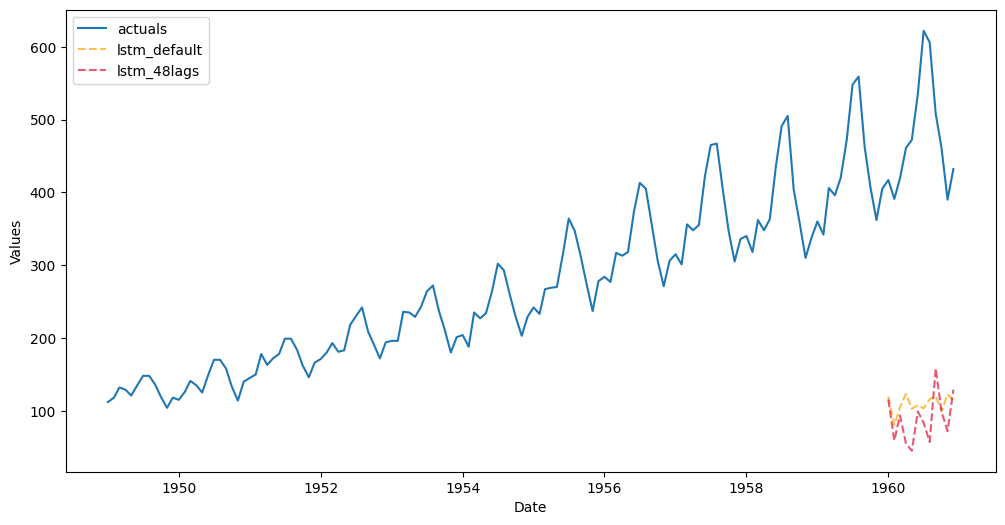

In [83]:
forc.manual_forecast(call_me='lstm_48lags',lags=48)
forc.plot_test_set(ci=True)

Epoch 1/5
3/3 [==============================] - 3s 286ms/step - loss: 0.3003 - val_loss: 0.5285
Epoch 2/5
3/3 [==============================] - 0s 37ms/step - loss: 0.2915 - val_loss: 0.5155
Epoch 3/5
3/3 [==============================] - 0s 37ms/step - loss: 0.2827 - val_loss: 0.5027
Epoch 4/5
3/3 [==============================] - 0s 48ms/step - loss: 0.2739 - val_loss: 0.4901
Epoch 5/5
1/1 [==============================] - 1s 759ms/step
Epoch 1/5
3/3 [==============================] - 2s 225ms/step - loss: 0.3232 - val_loss: 0.6307
Epoch 2/5
3/3 [==============================] - 0s 25ms/step - loss: 0.3178 - val_loss: 0.6232
Epoch 3/5
3/3 [==============================] - 0s 24ms/step - loss: 0.3123 - val_loss: 0.6157
Epoch 4/5
3/3 [==============================] - 0s 25ms/step - loss: 0.3065 - val_loss: 0.6079
Epoch 5/5
4/4 [==============================] - 0s 3ms/step


<Axes: xlabel='Date', ylabel='Values'>

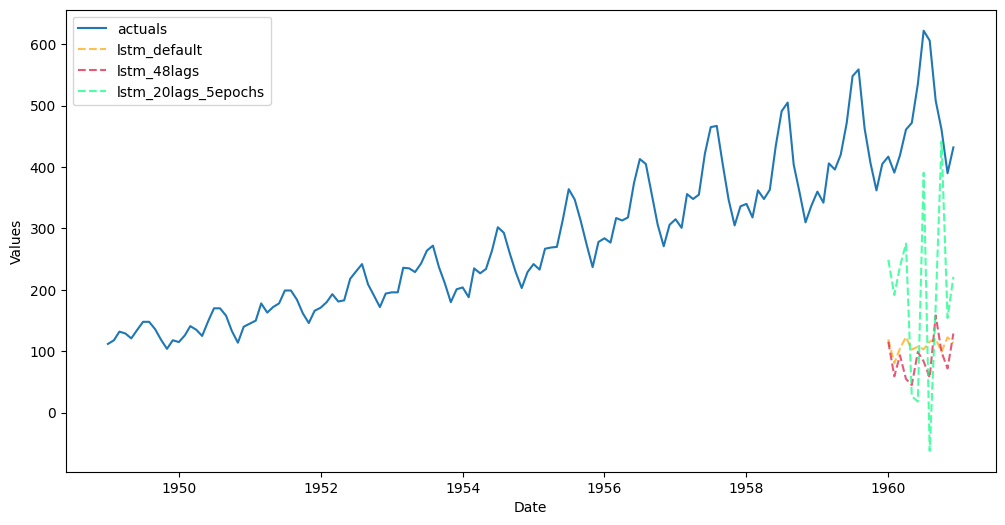

In [84]:
forc.manual_forecast(
    call_me="lstm_20lags_5epochs",
    lags=20,
    epochs=5,
    validation_split=.2,
    shuffle=True,
)
forc.plot_test_set(ci=True)

Epoch 1/25
3/3 [==============================] - 6s 572ms/step - loss: 0.3397 - val_loss: 0.5922
Epoch 2/25
3/3 [==============================] - 0s 44ms/step - loss: 0.3211 - val_loss: 0.5596
Epoch 3/25
3/3 [==============================] - 0s 43ms/step - loss: 0.2974 - val_loss: 0.5178
Epoch 4/25
3/3 [==============================] - 0s 43ms/step - loss: 0.2668 - val_loss: 0.4638
Epoch 5/25
3/3 [==============================] - 0s 43ms/step - loss: 0.2318 - val_loss: 0.4012
Epoch 6/25
3/3 [==============================] - 0s 42ms/step - loss: 0.2054 - val_loss: 0.3471
Epoch 7/25
3/3 [==============================] - 0s 42ms/step - loss: 0.1932 - val_loss: 0.3098
Epoch 8/25
3/3 [==============================] - 0s 41ms/step - loss: 0.1783 - val_loss: 0.2862
Epoch 9/25
3/3 [==============================] - 0s 43ms/step - loss: 0.1578 - val_loss: 0.2762
Epoch 10/25
3/3 [==============================] - 0s 43ms/step - loss: 0.1424 - val_loss: 0.2646
Epoch 11/25
3/3 [===========

<Axes: xlabel='Date', ylabel='Values'>

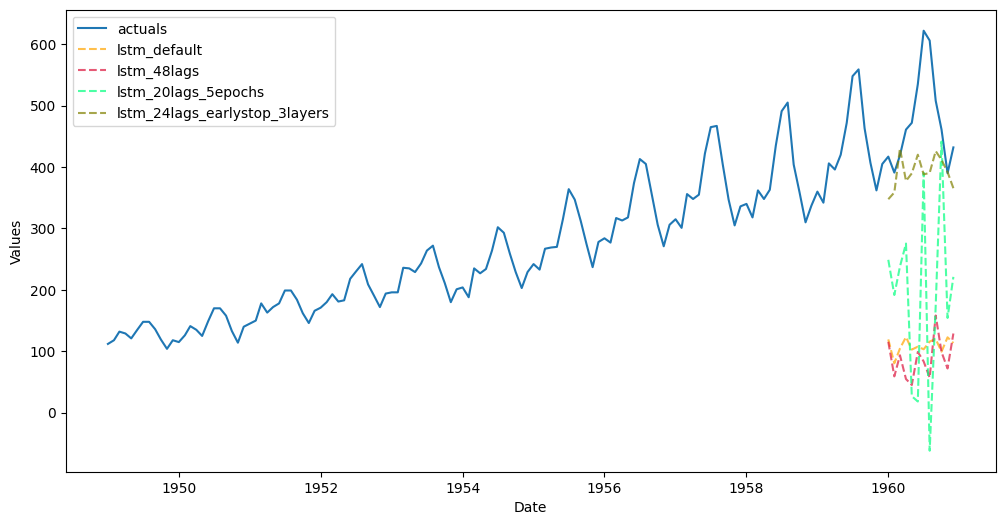

In [85]:
from tensorflow.keras.callbacks import EarlyStopping

forc.manual_forecast(
    call_me='lstm_24lags_earlystop_3layers',
    lags=24,
    epochs=25,
    validation_split=.2,
    shuffle=True,
    callbacks=EarlyStopping(
        monitor='val_loss',               
        patience=5,
    ),
    lstm_layer_sizes=(16,16,16),
    dropout=(0,0,0),
)

forc.plot_test_set(ci=True)


Epoch 1/25
2/2 [==============================] - 10s 2s/step - loss: 0.4830 - val_loss: 0.6452
Epoch 2/25
2/2 [==============================] - 0s 136ms/step - loss: 0.4702 - val_loss: 0.6274
Epoch 3/25
2/2 [==============================] - 0s 147ms/step - loss: 0.4540 - val_loss: 0.6037
Epoch 4/25
2/2 [==============================] - 0s 151ms/step - loss: 0.4326 - val_loss: 0.5714
Epoch 5/25
2/2 [==============================] - 0s 144ms/step - loss: 0.4041 - val_loss: 0.5283
Epoch 6/25
2/2 [==============================] - 0s 155ms/step - loss: 0.3638 - val_loss: 0.4744
Epoch 7/25
2/2 [==============================] - 0s 142ms/step - loss: 0.3243 - val_loss: 0.4260
Epoch 8/25
2/2 [==============================] - 0s 132ms/step - loss: 0.3082 - val_loss: 0.3993
Epoch 9/25
2/2 [==============================] - 0s 131ms/step - loss: 0.3040 - val_loss: 0.3790
Epoch 10/25
2/2 [==============================] - 0s 136ms/step - loss: 0.2954 - val_loss: 0.3599
Epoch 11/25
2/2 [====

<Axes: xlabel='Date', ylabel='Values'>

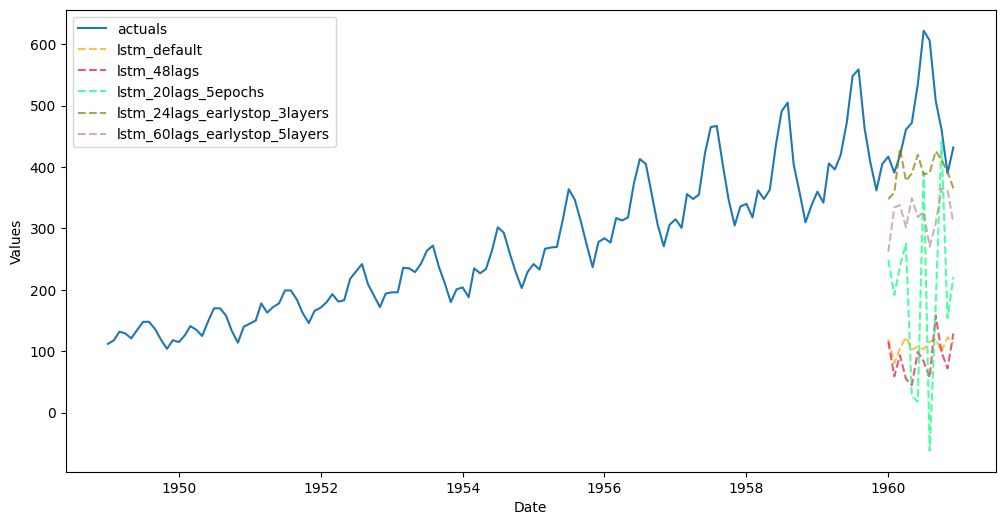

In [86]:
from tensorflow.keras.callbacks import EarlyStopping

forc.manual_forecast(
    call_me='lstm_60lags_earlystop_5layers',
    lags=60,
    epochs=25,
    validation_split=.2,
    shuffle=True,
    callbacks=EarlyStopping(
        monitor='val_loss',               
        patience=5,
    ),
    lstm_layer_sizes=(16,16,16,16,16),
    dropout=(0,0,0,0.2,0.2),
)

forc.plot_test_set(ci=True)


In [87]:
from scalecast.SeriesTransformer import SeriesTransformer

In [88]:
transformer = SeriesTransformer(forc)
forc = transformer.DiffTransform()

In [89]:
forc.add_ar_terms(24)
forc.add_seasonal_regressors('month','quarter',dummy=True)
forc.add_seasonal_regressors('year')
forc.add_time_trend()

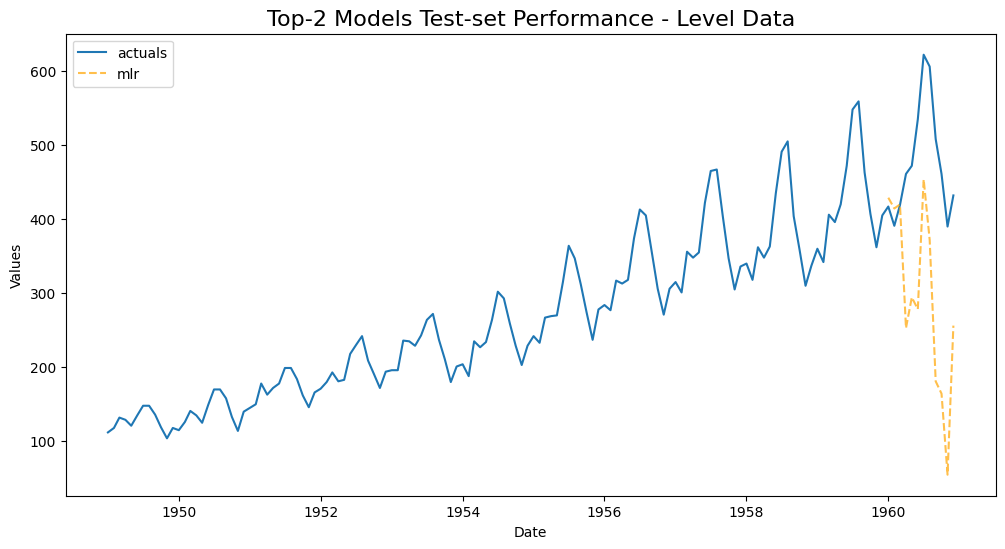

In [90]:
import matplotlib.pyplot as plt
forc.set_estimator('mlr')
forc.manual_forecast()

forc = transformer.DiffRevert(
    exclude_models = [m for m in forc.history if m != 'mlr']
) # exclude all lstm models from the revert

forc.plot_test_set(order_by='TestSetMAPE',models=['lstm_best','mlr'])
plt.title('Top-2 Models Test-set Performance - Level Data',size=16)
plt.show()

<Axes: xlabel='Date', ylabel='Values'>

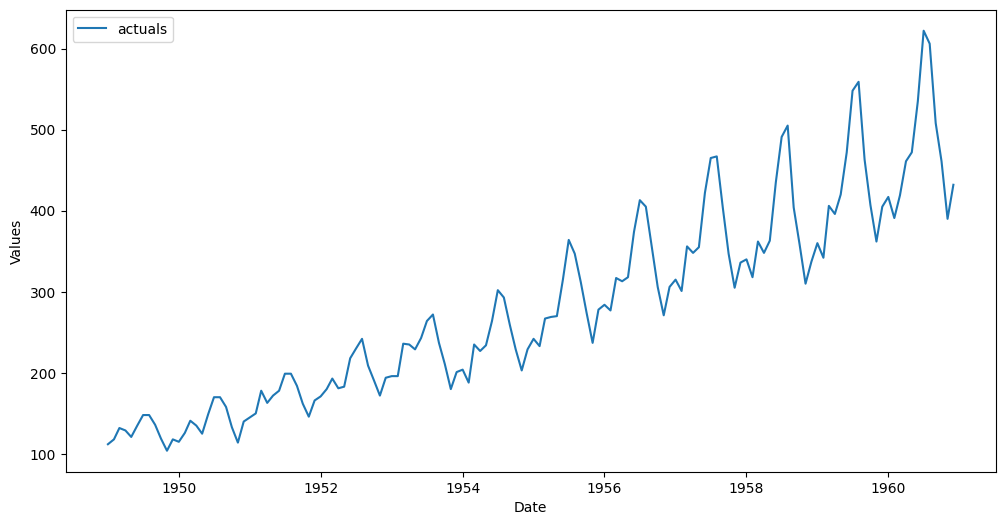

In [91]:
forc.plot(
    models=['mlr','lstm_best'],
    order_by='LevelTestSetMAPE',

)

In [92]:
forc.export('model_summaries',determine_best_by='LevelTestSetMAPE')[
    ['ModelNickname',
     'LevelTestSetMAPE',
     'LevelTestSetRMSE',
     'LevelTestSetR2',
     'best_model']
]

ValueError: ignored